In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import matplotlib.gridspec as gridspec

In [2]:
df = pd.read_csv('Music Sales.csv', index_col=None)

In [3]:
df_EA=df[df['Region'].isin(['Europe', 'Asia'])].copy()
df_genre = df_EA.groupby(['Genre'])['Quantity'].sum().reset_index()
df_genre.sort_values(by=['Quantity'], ascending=False, inplace=True)

### Axis
Axis properties like spines, ticks visibility and color can be changegd using 'rcparams'.
.gca() is used to get current axis in the figure.

### Graph Color
Appropriate color pallette has to be chosen. Diverging or sequential color pallette can be used with consideration to color blindness.

### Grid Lines
Unnecessary Grid lines and spine lines can be avoided

### Avoid Chart Junk
Data which doesnt add any value to Graphic should be avoided.


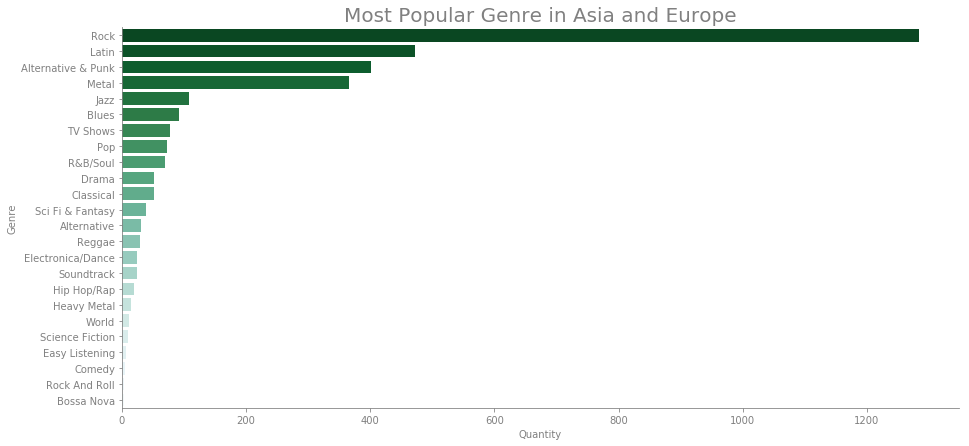

In [11]:
#Set plot size for the plots using figsize and rcParams
fig, ax = plt.subplots(figsize=(15,7))
#Get current axis is used to select the current grph
ax = fig.gca()
#rcParams is used to set default parameters in matplotlib
plt.rcParams["figure.figsize"] = (15,7)#this can be used as an alternative for setting figsize() in subplots
#xtick labels colors can be changed using 'xtick.color'
plt.rcParams['xtick.color'] = "grey"
plt.rcParams['ytick.color'] = "grey"
plt.rc('axes',edgecolor='Grey')

#bar plot using seaborn
sns.barplot(y='Genre', x='Quantity', data=df_genre, ax=ax,palette="BuGn_r")
plt.xlabel('Quantity',color="grey")
plt.ylabel('Genre',color="grey")

#current axis title, color, font size can be modified using ax.set_title
ax.set_title('Most Popular Genre in Asia and Europe', size=20,color='grey')

#graph border can be updated using ax.spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

### Subplots
Multiple small graphs are preferred over 3D graph. In below code, add_subplot() function is used to create 2 plots and each plot has different 'axis' settings.

Text(0.5, 1.0, 'Plot2')

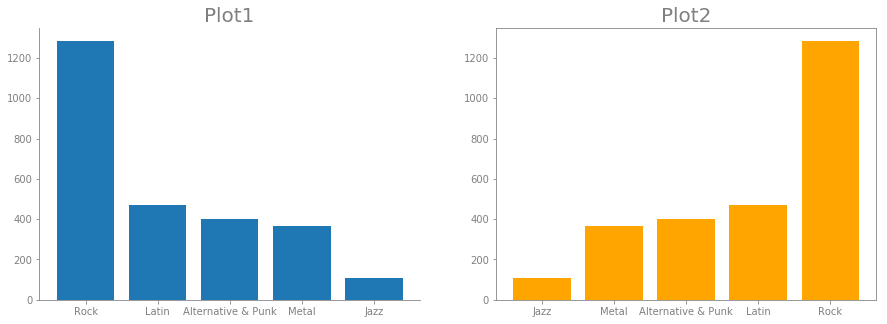

In [5]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.bar('Genre','Quantity',data=df_genre.iloc[:5])
ax.set_title('Plot1', size=20,color='grey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax2.bar('Genre','Quantity',data=df_genre.iloc[:5][::-1],color='orange')
ax2.set_title('Plot2', size=20,color='grey')

Plots can be added in a grid. We can set the figure size and each plot size using gridsize() along with colspan and rowspan values.

(array([1., 0., 2., 1., 0., 0., 0., 0., 0., 1.]),
 array([ 108. ,  225.6,  343.2,  460.8,  578.4,  696. ,  813.6,  931.2,
        1048.8, 1166.4, 1284. ]),
 <a list of 10 Patch objects>)

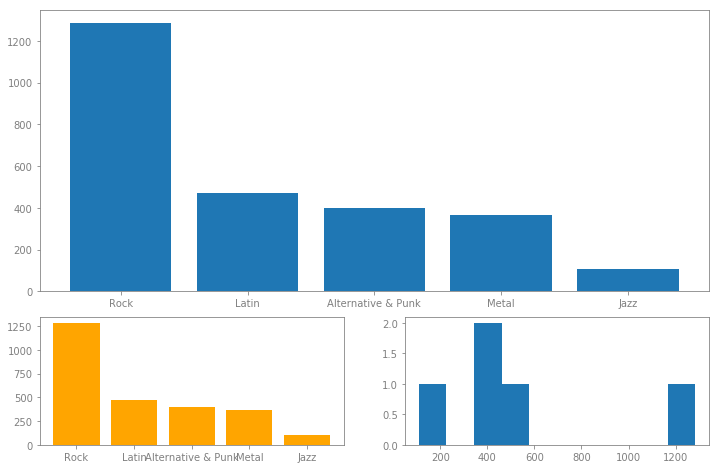

In [6]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))
ax1.bar('Genre','Quantity',data=df_genre.iloc[:5])
ax2.bar('Genre','Quantity',data=df_genre.iloc[:5],color='Orange')
ax3.hist('Quantity',data=df_genre.iloc[:5])

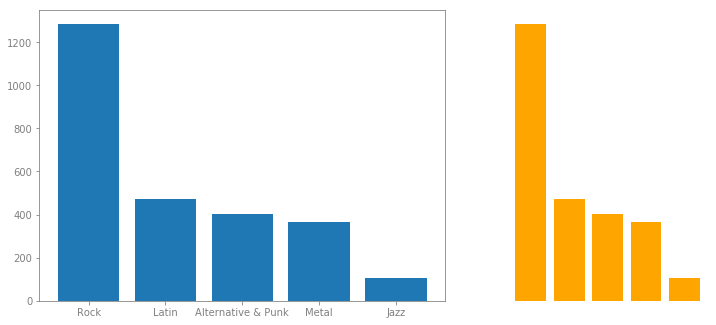

In [7]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)
gs = gridspec.GridSpec(2,2,width_ratios=[10,5],height_ratios=[10, 7],wspace=0.2)
ax1 = plt.subplot(gs[0])
ax1.bar('Genre','Quantity',data=df_genre.iloc[:5])
#plt.axis('off')
ax2 = plt.subplot(gs[1])
ax2.bar('Genre','Quantity',data=df_genre.iloc[:5],color='Orange')
plt.axis('off')
plt.show()

In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate_year'] = pd.to_datetime(df['InvoiceDate']).astype('datetime64[M]').dt.year
df['InvoiceDate_month'] = pd.to_datetime(df['InvoiceDate']).astype('datetime64[M]').dt.month
df['Invoice_YearMonth']=df['InvoiceDate'].dt.strftime("%Y-%m")
df.Invoice_YearMonth=pd.to_datetime(df.Invoice_YearMonth.astype(str),format='%Y-%m')
df.dtypes

Album                        object
Artist                       object
Bytes                        object
Sales                       float64
City                         object
Company                      object
Composer                     object
Country                      object
CustomerID                    int64
Email                        object
FirstName                    object
Genre                        object
InvoiceDate          datetime64[ns]
InvoiceID                     int64
LastName                     object
MediaType                    object
Milliseconds                  int64
Number of Records             int64
Phone                        object
PostalCode                   object
Quantity                      int64
Region                       object
State                        object
Track                        object
UnitPrice                   float64
InvoiceDate_year              int64
InvoiceDate_month             int64
Invoice_YearMonth    datetim

### Time series
1. Line chart is preferred for time series analysis.
2. Dual axis charts should be avoided.

### Legend
Legends should be placed in appropriate place, not disturbing any content of the graph

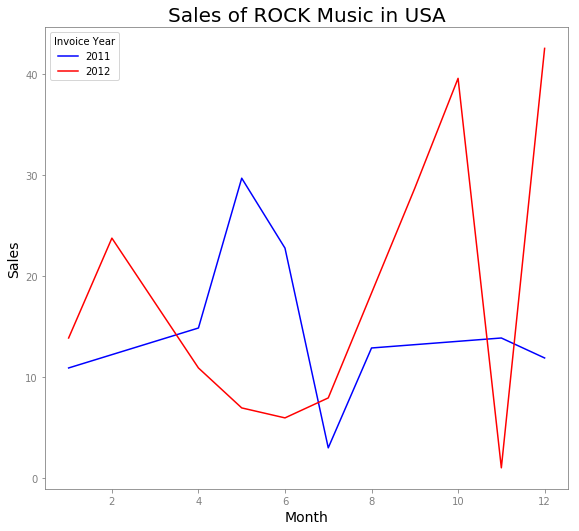

In [9]:
fig, ax = plt.subplots(figsize=(8,7))
ax = fig.gca()
df_rs=df[df.Region.isin(['North  America']) & df.Genre.isin(['Rock']) & df.InvoiceDate_year.isin(['2011','2012'])]
df_rs=df_rs.groupby(['InvoiceDate_month','InvoiceDate_year'])['Sales'].sum().reset_index()
df_2011=df_rs[df_rs['InvoiceDate_year']==2011].sort_values('InvoiceDate_month')
df_2012=df_rs[df_rs['InvoiceDate_year']==2012].sort_values('InvoiceDate_month')

plt.tight_layout()
ax.plot(df_2011['InvoiceDate_month'],df_2011['Sales'],'b',label=2011)
ax.plot(df_2012['InvoiceDate_month'],df_2012['Sales'],'r',label=2012)
ax.legend(title='Invoice Year', loc='upper left', labels=['2011', '2012'])
plt.title('Sales of ROCK Music in USA', size=20)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.show()

### Annotation and Scale
1. Annotations can be added if needed. In below code, Annotation and label values are added with Math functions.
2. Scale should distract user from the content. Preferrably scales should be placed in Left.

Text(-90, -50, '$cos(\\frac{2\\pi}{3})=-\\frac{1}{2}$')

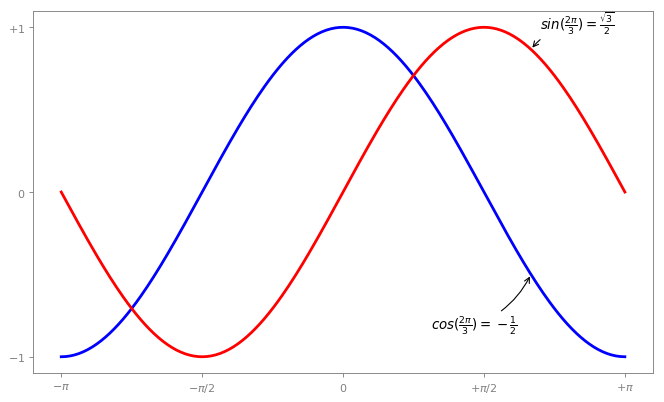

In [10]:
plt.figure(figsize=(10, 6), dpi=80)
plt.subplot(1, 1, 1)

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
          [r'$-1$', r'$0$', r'$+1$'])
plt.plot(X, np.cos(X), color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, np.sin(X), color="red",  linewidth=2.5, linestyle="-")
t = 2 * np.pi / 3

plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+8, +18), textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
